<a href="https://colab.research.google.com/github/carobs9/machine-learning-basics/blob/main/el_amante_jap_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resources:

http://librarycarpentry.org/lc-tdm/12-collocations/index.html

https://medium.com/@finalfire/one-hundred-years-of-solitude-how-i-analyzed-my-favorite-book-6c20456480c8

https://becominghuman.ai/nlp-for-beginners-using-nltk-f58ec22005cd

https://towardsdatascience.com/superior-person-name-recognition-with-pre-built-google-bert-e6215186eae0

https://spacy.io/usage/linguistic-features#mappings-exceptions

In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    IN_COLAB = True
except:
    IN_COLAB = False

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/NLP/

[Errno 2] No such file or directory: '/content/drive/MyDrive/NLP/'
/content


In [3]:
!git init el_amante_japones_analysis

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/el_amante_japones_analysis/.git/


In [4]:
%cd el_amante_japones_analysis

/content/el_amante_japones_analysis


In [5]:
%ls -a

./  ../  .git/


In [6]:
%%capture
!pip install PyPDF2
!pip install datasets
!pip install torch
!pip install transformers==4.12.3
!pip install datasets

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import PyPDF2
import regex as re
import unicodedata
import nltk
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk import WordNetLemmatizer
# Other imports
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib import pyplot as plt
%matplotlib inline
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
snowball_stemmer = SnowballStemmer('spanish')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
# @title Extracting Text


In [16]:
def extract_text_from_pdf(pdf_file_path):
    text = ""
    with open(pdf_file_path, "rb") as pdf_file:
        pdf_reader = PyPDF2.PdfReader(pdf_file)

        num_pages = len(pdf_reader.pages)

        # Loop through all pages and extract text
        for page_num in range(num_pages):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()

    return text

# Example usage:
pdf_file_path = "/content/drive/MyDrive/el_amante_japones/el-amante-japones-isabel-allende.pdf"
extracted_text = extract_text_from_pdf(pdf_file_path)

In [13]:
output_file_path = "/content/drive/MyDrive/el_amante_japones/extracted_text.txt"
def save_text_to_file(text, output_file_path):
    with open(output_file_path, "w", encoding="utf-8") as output_file:
        output_file.write(text)
# Save the extracted text to a file
save_text_to_file(extracted_text, output_file_path)

In [17]:
pdf_file_path = "/content/drive/MyDrive/el_amante_japones/el-amante-japones-isabel-allende.pdf"
def read_text_from_file(pdf_file_path):
    with open(pdf_file_path, "r", encoding="utf-8") as input_file:
        return input_file.read()

# Read the text back from the file
extracted_text = read_text_from_file(pdf_file_path)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe2 in position 10: invalid continuation byte

In [ ]:
# @title Preprocessing Text


In [18]:
text_lower = extracted_text.lower()
text_normalized = unicodedata.normalize('NFKD', text_lower).encode('ascii', 'ignore').decode('utf-8')
filtered_text = re.sub('[^A-Za-z0-9\s]', ' ', text_normalized)
#filtered_text = re.sub('[^A-Za-z0-9áéíóúÁÉÍÓÚñÑüÜ\s]', ' ',text_lower)
tokens = nltk.word_tokenize(filtered_text)
tokens_no_stopwords = [word for word in tokens if word not in nltk.corpus.stopwords.words('spanish')]
stemmed_words = [snowball_stemmer.stem(word) for word in tokens_no_stopwords]


In [19]:
# @title Getting Most Common Stemmed Tokens


In [20]:
freq = nltk.FreqDist(stemmed_words)
print(freq.most_common(200))

[('habi', 747), ('alma', 566), ('mas', 382), ('irin', 342), ('anos', 276), ('ichimei', 253), ('pas', 209), ('sol', 208), ('nathaniel', 201), ('si', 191), ('cas', 186), ('belasc', 182), ('seth', 167), ('teni', 159), ('podi', 153), ('dos', 149), ('vid', 147), ('mism', 141), ('famili', 139), ('despu', 135), ('lleg', 135), ('ser', 133), ('vez', 128), ('hac', 126), ('hous', 120), ('hij', 119), ('lark', 116), ('tiemp', 112), ('hombr', 110), ('siempr', 109), ('primer', 108), ('isaac', 108), ('man', 107), ('padr', 106), ('llev', 106), ('mes', 106), ('nin', 105), ('amor', 104), ('dij', 103), ('pregunt', 99), ('abuel', 99), ('esper', 98), ('tan', 97), ('dia', 96), ('nadi', 95), ('nunc', 95), ('viv', 94), ('fukud', 93), ('dej', 92), ('llam', 91), ('iba', 91), ('trabaj', 89), ('qued', 89), ('hor', 88), ('lenny', 88), ('buen', 85), ('habl', 83), ('haci', 83), ('unic', 82), ('pud', 82), ('noch', 82), ('lilli', 82), ('muj', 81), ('tres', 80), ('pued', 79), ('part', 78), ('habri', 77), ('tard', 75), (

In [21]:
# @title Word Counts (Uncleaned and Cleaned Text)


In [22]:
def word_count(text):
  if type(text) == list:
        text = ' '.join(text)
  words = text.split()
  # Create an empty dictionary
  d = dict()

  # Iterate over each word in line
  for word in words:
      word = word.lower()
        # Check if the word is already in dictionary
      if word in d:
            # Increment count of word by 1
          d[word] = d[word] + 1
      else:
            # Add the word to dictionary with count 1
          d[word] = 1
  # Print the contents of dictionary
  sorted_d = sorted(d.items(), key=lambda x:x[1], reverse=True)
  #return(sorted_d)

  # Using zip function and Unpacking the values
  word_used, occurrence = zip(*sorted_d)

# printing the scatter values
#print(word_used)
#print(occurrence)

  plt.scatter(word_used[0:50], occurrence[0:50])
  plt.xticks(rotation = 90)
  plt.title('Top 50 Used Words and Occurence')
  plt.show()

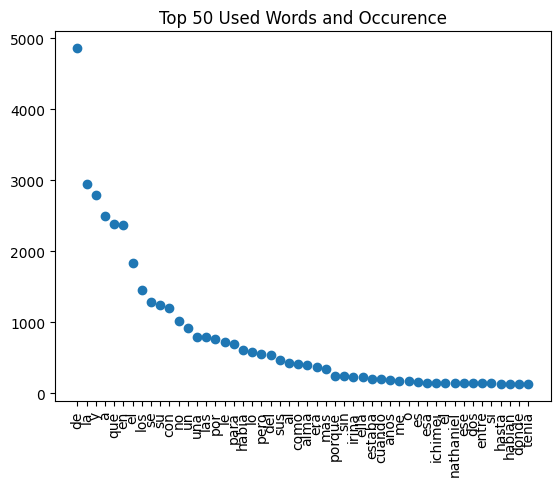

In [23]:
word_count(extracted_text)

In [24]:
def word_count_clean(text):
# Tokenize the text into words
  words = word_tokenize(text.lower())
# Remove stopwords
  stop_words = nltk.corpus.stopwords.words('spanish')
  filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

# Create an empty dictionary
  d = dict()
# Iterate over each word in line
  for word in filtered_words:
      word = word.lower()
        # Check if the word is already in dictionary
      if word in d:
            # Increment count of word by 1
          d[word] = d[word] + 1
      else:
            # Add the word to dictionary with count 1
          d[word] = 1
  # Print the contents of dictionary
  sorted_d = sorted(d.items(), key=lambda x:x[1], reverse=True)
  #return(sorted_d)

  # Using zip function and Unpacking the values
  word_used, occurrence = zip(*sorted_d)

# printing the scatter values
#print(word_used)
#print(occurrence)

  plt.scatter(word_used[0:50], occurrence[0:50])
  plt.xticks(rotation = 90)
  plt.title('Top 50 Used Words and Occurence (No Stopwords)')
  plt.show()

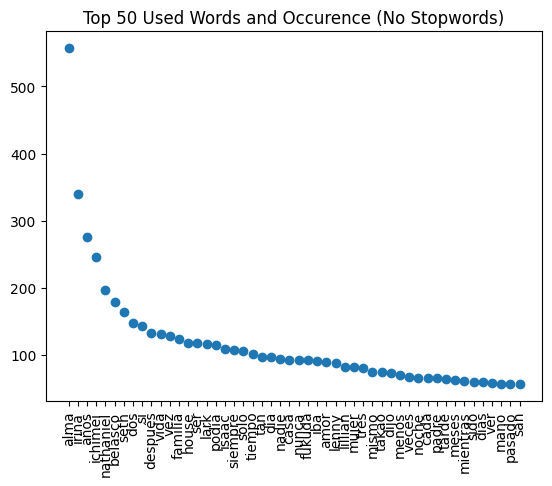

In [25]:
word_count_clean(extracted_text)

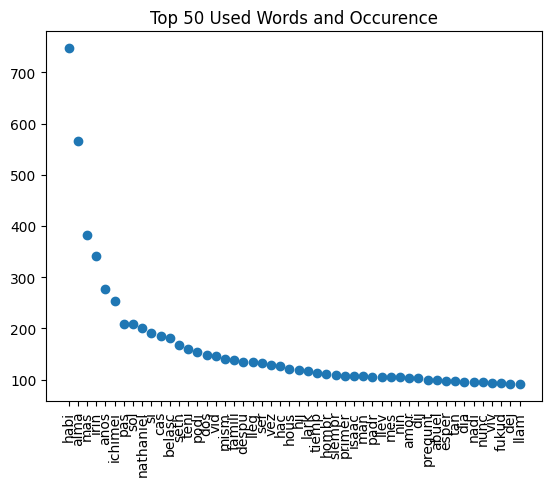

In [26]:
word_count(stemmed_words)

In [27]:
# @title More Analysis (Lexical Dispersion, Collocations)


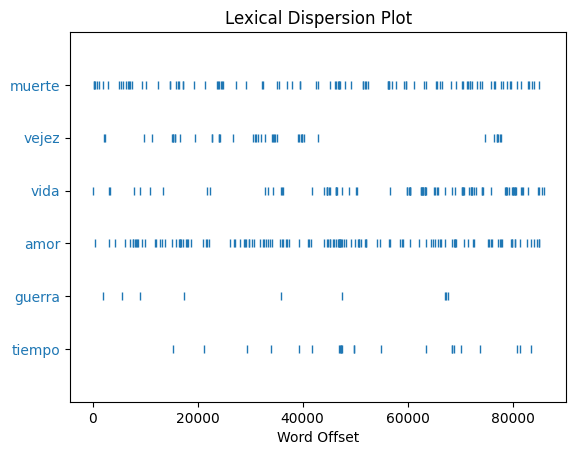

In [28]:
ntext = nltk.Text(tokens)
ntext.dispersion_plot(['tiempo', 'guerra', 'amor', 'vida', 'vejez', 'muerte'])

In [29]:
ntext.collocations(window_size=2, num=30)

lark house; san francisco; sea cliff; isaac belasco; hans voigt; mas
tarde; catherine hope; jacques devine; lenny beal; estados unidos; los
fukuda; sus padres; boyd anderson; los ojos; habia sido; tal vez;
irina bazili; una vez; primera vez; tia lillian; lupita farias; habia
visto; ron wilkins; con una; cada uno; habia hecho; los belasco; sus
abuelos; miss honeycomb; vera neumann


In [30]:
# @title Characters Analysis

In [31]:
for name in ('Alma', 'Ichimei', 'Nathaniel', 'Seth', 'Irina', 'Isaac', 'Lenny', 'Lillian'):
    print('{}:'.format(name), freq.get(name.lower()))

Alma: 566
Ichimei: 253
Nathaniel: 201
Seth: 167
Irina: None
Isaac: 108
Lenny: 88
Lillian: None


In [32]:
# @title Fine Tuning NER Spacy Model with my Own Custom Data


In [33]:
# training data which might be useful in the future for fine tuning
TRAIN_DATA = [
    ('Quién es Ichimei?', {
        'entities': [(9, 15, 'PERSON')]
    }),
     ('Quién es Isaac Belasco?', {
        'entities': [(9, 21, 'PERSON')]
    }),
    ('Me gustan Lark House and San Francisco.', {
        'entities': [(10, 19, 'LOC'), (25, 37, 'LOC')]
    }),
    ('A Alma le gusta comer?', {
        'entities': [(2, 5, 'PERSON')]
    }),
    ('Además somos Seth y Lillian', {
        'entities': [(13, 16, 'PERSON'), (20, 26, 'PERSON')]
    }),
]

In [34]:
import json

with open("/content/drive/MyDrive/el_amante_japones/annotations.json", 'r') as f:
  DATA = json.load(f)["annotations"]

#with open("/content/drive/MyDrive/el_amante_japones/annotations (1).json", 'r') as f:
#  DATA_2 = json.load(f)["annotations"]

# Merge the data from both files
#merged_data = DATA + DATA_2

# Write the merged data to a new JSON file
#with open("/content/drive/MyDrive/el_amante_japones/merged_annotations.json", 'w') as f:
#    json.dump({"annotations": merged_data}, f, indent=4)

In [35]:
# @title Important Resource https://towardsdatascience.com/how-to-mass-identify-recurring-textual-features-e3e98c4b0309

## Importing pretrained tokenizer and model

In [36]:
%%capture
!pip install transformers

In [37]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
tokenizer = AutoTokenizer.from_pretrained('MMG/xlm-roberta-large-ner-spanish')
model = AutoModelForTokenClassification.from_pretrained('MMG/xlm-roberta-large-ner-spanish')

nlp = pipeline("ner", model=model, tokenizer=tokenizer)
example = "Me llamo Alma y vivo en Lark House"
# Tokenize the input manually
tokens = word_tokenize(example.lower())

# Use the tokenized input for NER
ner_results = nlp(tokens)
print(ner_results)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

[[], [], [], [], [], [], [], []]


In [38]:
ner_novel = nlp(extracted_text)

In [39]:
ner_novel

[{'entity': 'B-MISC',
  'score': 0.9227004,
  'index': 1,
  'word': '▁WWW',
  'start': 24,
  'end': 27},
 {'entity': 'I-ORG',
  'score': 0.34754592,
  'index': 2,
  'word': '.',
  'start': 27,
  'end': 28},
 {'entity': 'B-MISC',
  'score': 0.8723368,
  'index': 3,
  'word': 'ME',
  'start': 28,
  'end': 30},
 {'entity': 'I-MISC',
  'score': 0.8481777,
  'index': 4,
  'word': 'G',
  'start': 30,
  'end': 31},
 {'entity': 'I-MISC',
  'score': 0.8921418,
  'index': 5,
  'word': 'UST',
  'start': 31,
  'end': 34},
 {'entity': 'I-MISC',
  'score': 0.93701833,
  'index': 6,
  'word': 'ALE',
  'start': 34,
  'end': 37},
 {'entity': 'I-MISC',
  'score': 0.82693815,
  'index': 7,
  'word': 'ERE',
  'start': 37,
  'end': 40},
 {'entity': 'I-MISC',
  'score': 0.89057666,
  'index': 8,
  'word': 'BOOK',
  'start': 40,
  'end': 44},
 {'entity': 'I-MISC',
  'score': 0.8478054,
  'index': 9,
  'word': 'S',
  'start': 44,
  'end': 45},
 {'entity': 'I-MISC',
  'score': 0.5103528,
  'index': 11,
  'word

In [40]:
for entity_info in ner_novel:
    entity_type = entity_info['entity']
    if entity_type == 'I-PER':
      print(entity_info)

{'entity': 'I-PER', 'score': 0.69439584, 'index': 69, 'word': 'ÉS', 'start': 277, 'end': 279}
{'entity': 'I-PER', 'score': 0.91298246, 'index': 70, 'word': '▁DE', 'start': 280, 'end': 282}
{'entity': 'I-PER', 'score': 0.95173335, 'index': 71, 'word': '▁LA', 'start': 283, 'end': 285}
{'entity': 'I-PER', 'score': 0.8423548, 'index': 72, 'word': '▁C', 'start': 287, 'end': 288}
{'entity': 'I-PER', 'score': 0.7050925, 'index': 73, 'word': '▁R', 'start': 289, 'end': 290}
{'entity': 'I-PER', 'score': 0.99840957, 'index': 81, 'word': '▁Baz', 'start': 318, 'end': 321}
{'entity': 'I-PER', 'score': 0.9870444, 'index': 82, 'word': 'ili', 'start': 321, 'end': 324}
{'entity': 'I-PER', 'score': 0.99806017, 'index': 367, 'word': '▁Vo', 'start': 1512, 'end': 1514}
{'entity': 'I-PER', 'score': 0.993628, 'index': 368, 'word': 'igt', 'start': 1514, 'end': 1517}


In [41]:
# Create a dictionary to store entities based on their type
entity_dict = {'B-PER': '', 'I-PER': ''}

# Iterate over the data and concatenate entities based on their type
for entity_info in ner_novel:
    entity_type = entity_info['entity']
    if entity_type == 'B-PER':# or entity_type.startswith('I-PER'):
        entity_dict[entity_type] += entity_info['word']

# Print the concatenated entities
for entity_type, concatenated_entity in entity_dict.items():
    print(f"{entity_type}: {concatenated_entity}")

B-PER: ▁Panchita▁Ramón▁S▁OR▁J▁UANA▁I▁N▁Irina▁Hans▁Irina▁Irina▁Voigt▁Irina
I-PER: 
